<a href="https://colab.research.google.com/github/ms624atyale/Data_Analysis/blob/main/11_NormalityTest_SWtest_KStest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💦🔥 **Normality test**

1. **Small sample size (N<50)**, which is comparable to **Shapiro-Wilk** test on SPSS

2. **Big sample size (N>50)**, which is comparable to **Kolmogorov-Smirnov** test on SPSS



# <font color = 'green'> **1️⃣  Small Sample Size (N < 50)**
    **Be** aware that the following script generates different results for everyone running it!

## CTT (Critical Test Threshold)

- The p-value represents the probability of observing the test statistic (or more extreme) under the assumption that the null hypothesis is true. However, it doesn't provide information about the size of the effect or the practical significance of the result.

- On the other hand, the critical test threshold (CTT) is the predetermined significance level (often denoted as alpha) at which you're willing to reject the null hypothesis. It is typically set to 0.05.

# <font color = 'green'> **1️⃣-1️⃣  Small Sample Size with Gaussian distribution (N < 50)**

In [ ]:
import numpy as np # numeric calculation
import pandas as pd # data analysis
import seaborn as sns
from scipy.stats import shapiro # stats

# Generate a random dataset (replace this with your own data)
# 🔔 The following code line generates random numbers from a normal (Gaussian) distribution using NumPy's random.normal function.
# 🔔 loc=3, scale=1, size=50 (creating an array of 50 numbers drawn from a normal distribution with a mean (loc) of 3 and a standard deviation (scale) of 1.
data_gaussian = np.random.normal(loc=3, scale=1, size=50)
print(data_gaussian)
print('\n')

# Convert the data to a pandas DataFrame
df1 = pd.DataFrame(data_gaussian, columns=['Values'])
print('Full set of data points for Gaussian data:')
print(df1)
print('\n')

# Save the DataFrame to a CSV file
df1.to_csv('generated_data1.csv', index=True) # index=True for inncluding index

# Perform Shapiro-Wilk test for normality
# 🔔 Tuple unpacking: shapiro() function returns a tuple containing two values: the test statistic and the p-value.
# By separating statistic and p_value with a comma, Python interprets the returned tuple and assigns each value to its corresponding variable.
statistic, p_value = shapiro(data_gaussian)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")



[3.06311558 3.86024082 5.24056753 4.41255991 3.11703544 2.89910458
 4.46749156 4.20509746 2.21820283 1.90498566 3.52920426 2.60171916
 1.89369714 3.28945091 2.48834318 2.60457086 2.90929974 2.07556486
 2.67327347 2.57463426 3.29401441 2.1100155  2.66021632 1.69105299
 2.73875519 3.82558354 3.03448616 2.56519025 1.30169108 3.58212535
 2.0990314  1.46595429 3.84368046 3.64145275 3.21058476 3.94553459
 2.97955747 3.46802949 2.18571275 3.4094476  5.02474199 1.71493991
 3.24668187 2.80447751 3.89664552 2.14190691 3.91980557 3.18361755
 1.3497368  4.02492624]


Full set of data points for Gaussian data:
      Values
0   3.063116
1   3.860241
2   5.240568
3   4.412560
4   3.117035
5   2.899105
6   4.467492
7   4.205097
8   2.218203
9   1.904986
10  3.529204
11  2.601719
12  1.893697
13  3.289451
14  2.488343
15  2.604571
16  2.909300
17  2.075565
18  2.673273
19  2.574634
20  3.294014
21  2.110016
22  2.660216
23  1.691053
24  2.738755
25  3.825584
26  3.034486
27  2.565190
28  1.301691
29  3

# ↘️ ↘️  

## 🍪 🍩 **T-test for a pair-wise comparison for further analysis**

# <font color = 'green'> **1️⃣-2️⃣  Small Sample Size with non-Gaussian distribution (N < 50)**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro


# Generate data from an exponential distribution
data_non_gaussian = np.random.exponential(scale=3, size=50) #generates 50 data points from an exponential distribution with a mean of 3.


# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(data_non_gaussian)
print(data_non_gaussian)
print('\n')


# Convert the data to a pandas DataFrame
df2 = pd.DataFrame(data_non_gaussian, columns=['Values'])
# Display the full set of data points
print("Full set of data points for Non-Gaussian data:")
print(df2)
print('\n')

# Save the DataFrame to a CSV file
df2.to_csv('non_gaussian_data.csv', index=True)

# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(data_non_gaussian)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

[ 4.39128392  1.41805837  2.20597581  5.4970073   7.42303778 11.47524251
  1.77188     2.03501022  2.22673078  0.4714642   1.14991258  3.4717296
  0.68448441  0.13604393  7.0807502   1.67095137  0.8621325   3.19275737
  0.92592303  5.11435575  8.22767977  0.413394    1.71005851  8.69885117
  0.38827459  3.34495732  1.96514109  6.0195781  13.82396358  5.02167033
  0.07854986  0.75967128  1.95750198  2.71723662  0.30399046  0.42914018
  0.07029064  0.65813941  5.21040325  3.65673902  9.53146709  3.03009873
  4.0309487   3.12213196  5.45283571  1.56900323  1.32938533  0.68548009
  1.34637133  6.82161805]


Full set of data points for Non-Gaussian data:
       Values
0    4.391284
1    1.418058
2    2.205976
3    5.497007
4    7.423038
5   11.475243
6    1.771880
7    2.035010
8    2.226731
9    0.471464
10   1.149913
11   3.471730
12   0.684484
13   0.136044
14   7.080750
15   1.670951
16   0.862133
17   3.192757
18   0.925923
19   5.114356
20   8.227680
21   0.413394
22   1.710059
23   8

**e-0X in standard decimal notation is to move the decimal point X places to the left:**

- **e.g., 0.345e-08 ➡️ 0.0000000345**

# ↘️ ↘️  

##🍓 🍉**Mann Witney U test (aka. Wilcoxon Rank Sum test) for a pair-wise comparison for further analysis**

# <font color = 'green'> **2️⃣ Big Sample Size (N > 50)**
    Be aware that the following script generates different results for everyone running it!

# <font color = 'orange'> **2️⃣-1️⃣  Big Sample Size with Gaussian distribution (N > 50)**

In [37]:
import numpy as np # numeric calculation
import pandas as pd # data analysis
import seaborn as sns
from scipy.stats import kstest, norm # stats


# Generate a random dataset (replace this with your own data)
# loc=1, scale=0.5, size=100 (creating an array of 100 numbers drawn from a normal distribution with a mean (loc) of 1 and a standard deviation (scale) of 1.
data_big_gaussian = np.random.normal(loc=1, scale=0.5, size=100)
print(data_big_gaussian)
print('\n')

# Convert the data to a pandas DataFrame
df3 = pd.DataFrame(data_big_gaussian, columns=['Values'])
print(df3)
print('\n')

# Save the DataFrame to a CSV file
df3.to_csv('GeneratedGaussianBigSampleData.csv', index=True)

# 💊 Perform Kolmogorov-Smirnov test for normality ⤵️
statistic, p_value = kstest(df3['Values'], 'norm', args=(df3['Values'].mean(), df3['Values'].std()))

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

[ 0.61781765  0.7912481   0.36777432  1.52308372  1.15808099  0.23735915
  1.29686547  1.19228686  0.60228904  1.19381665  1.63882066  0.60333817
  1.86042303  1.518537    1.19258036  0.69505106  0.50963509  1.78837474
  0.75794065  0.75822942  1.45417743  0.74748906  0.00956366  0.25569892
  1.39482845  1.55153056  1.16063736  1.41041928  1.68023461  1.11192284
  2.00486135  0.81201646  1.53933154  0.53984347  0.88444916  0.97161884
 -0.30330475  1.25481634  0.93472928  0.71746276  1.23139219  0.90989753
  1.148268    1.65414316  0.75550258  0.67113596  0.73280622  0.10261765
  1.75236624  0.37958283  1.20814011  0.51662349  1.13588965  0.96709229
  1.12298357  1.39212171  1.40336803  1.15935017  1.50458622  1.42051318
 -0.20998854  0.3942417   0.61280541  0.72071212  0.85961462  1.38226784
  0.34501195  0.86886415  0.67414383  1.10806712  1.16985536 -0.23443792
  1.35043853  1.04427918  0.43239287  1.6671122   1.76540842  0.51157622
  1.0596111   0.95827176  0.96461315  0.98907364  1

💊 **statistic, p_value = kstest(df3['Values'], 'norm', args=(df3['Values'].mean(), df3['Values'].std()))**

<font color = 'red'> **Arguments:**

- <font color = 'red'> **df3['Values']**</font>: This is the data we want to test for normality. It is passed as the first argument to kstest().
- <font color = 'red'> **'norm'**</font>: This specifies that we want to test the data against a normal distribution.
- <font color = 'red'> **args=(df3['Values'].mean(), df3['Values'].std())**</font>: This argument allows us to pass additional parameters to the distribution function being tested against.
    - Here, we're passing the mean (df3['Values'].mean()) and standard deviation (df3['Values'].std()) of the data as parameters to the normal distribution. This ensures that the K-S test is performed with the mean and standard deviation of our data as parameters for the normal distribution.

**Output:**

<font color = 'green'> The **kstest()** function returns two values: the _K-S test statistic (statistic)_ and the _p-value (p_value)_. These values are assigned to the variables statistic and p_value, respectively.

# <font color = 'orange'> **2️⃣-2️⃣ Big Sample Size with Gaussian distribution (N > 50)**

In [38]:
import numpy as np # numeric calculation
import pandas as pd # data analysis
import seaborn as sns
from scipy.stats import kstest, norm # stats


# Generate data from an exponential distribution
data_big_non_gaussian = np.random.exponential(scale=1, size=100) #generates 50 data points from an exponential distribution with a mean of 3.
print(data_big_non_gaussian)
print('\n')

# Convert the data to a pandas DataFrame
df4 = pd.DataFrame(data_big_non_gaussian, columns=['Values'])
print(df4)
print('\n')

# Save the DataFrame to a CSV file
df4.to_csv('GeneratedNonGaussianBigSampleData.csv', index=True)

# 💊 Perform Kolmogorov-Smirnov test for normality ⤵️
statistic, p_value = kstest(df4['Values'], 'norm', args=(df4['Values'].mean(), df3['Values'].std()))

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


[8.20147151e-01 4.22674693e-01 1.05846077e+00 5.39404820e-03
 1.50459820e+00 1.53811504e-01 1.06914709e+00 1.54391236e-01
 7.60574605e-01 8.42620947e-01 6.13061910e-02 1.27825782e+00
 3.18264775e+00 6.85519157e-01 7.85484505e-01 4.46648069e+00
 5.06281241e+00 6.11285553e-01 1.15904978e+00 1.61752297e+00
 9.39241714e-04 9.44470064e-01 1.62839117e+00 1.57107315e+00
 2.69755179e+00 2.37583546e+00 2.88548184e-01 8.71483581e-01
 9.74838146e-01 4.62997651e-01 8.22361774e+00 5.34217082e-02
 1.41043353e+00 1.31933228e+00 1.89054474e+00 2.38005277e-01
 1.83623391e-01 2.83600864e+00 6.50287054e+00 3.28047614e+00
 1.78896164e+00 2.24473463e-01 1.70606139e-01 2.31402610e+00
 6.12512524e-01 1.06913375e-01 2.19731704e-01 3.71340794e-01
 2.22493926e+00 8.57974984e-01 7.41702205e-01 6.85038447e-01
 1.14857781e-01 5.67300950e-01 3.16733644e-01 6.81152904e-01
 6.51219000e-02 2.56506878e+00 9.42507065e-01 5.50887362e-01
 1.27629178e+00 5.63831142e-01 1.13583609e+00 2.29192532e+00
 2.13322222e+00 1.147788

## 💿 💿 3️⃣-1️⃣ When you use your csv. file (e.g., downloading from url or on your machine...)
    Be aware that the following script generates the same result for everyone running it!

In [39]:
import urllib.request

#🍎 URL of the CSV file
url = 'https://raw.githubusercontent.com/ms624atyale/Data_NLP2024/main/GeneratedGaussianBigSampleData.csv'
response = urllib.request.urlopen(url)
content = response.read().decode('utf-8')
print(content)

# Read the CSV data from the URL into a pandas DataFrame
df = pd.read_csv(url)

# Specify the column name
df_final = pd.DataFrame(df, columns=['Values'])
print(df_final)
print('\n')

# Save the DataFrame to a CSV file with index numbers
df_final.to_csv('GeneratedGaussianBigSampleData.csv', index=True)


#🍎 URL of the CSV file
url2 = 'https://raw.githubusercontent.com/ms624atyale/Data_NLP2024/main/GeneratedNonGaussianBigSampleData.csv'
response2 = urllib.request.urlopen(url2)
content2 = response2.read().decode('utf-8')
print(content2)

# Read the CSV data from the URL into a pandas DataFrame
df2 = pd.read_csv(url2)

# Specify the column name
df2_final = pd.DataFrame(df2, columns=['Values'])
print(df2_final)
print('\n')

# Save the DataFrame to a CSV file with index numbers
df2_final.to_csv('GeneratedNonGaussianBigSampleData.csv', index=True)

,Values
0,0.6178176473620463
1,0.7912481030518945
2,0.36777431855165343
3,1.5230837217131619
4,1.1580809936938505
5,0.2373591538415757
6,1.296865471245577
7,1.192286864506459
8,0.6022890374102259
9,1.19381665139659
10,1.6388206571572619
11,0.6033381674233027
12,1.8604230258865644
13,1.5185369970790945
14,1.1925803641598587
15,0.6950510617925922
16,0.5096350878708151
17,1.7883747360875046
18,0.7579406523024679
19,0.7582294179059947
20,1.454177430568317
21,0.7474890604375727
22,0.009563657276223991
23,0.2556989223309364
24,1.394828452103342
25,1.5515305584079389
26,1.1606373568364
27,1.4104192780669098
28,1.6802346136502506
29,1.111922843003799
30,2.004861354806782
31,0.8120164573486299
32,1.5393315418713538
33,0.5398434655610693
34,0.8844491568095957
35,0.9716188388775707
36,-0.3033047499388213
37,1.2548163386530313
38,0.9347292760324919
39,0.7174627640423497
40,1.2313921869579096
41,0.9098975309611567
42,1.1482680031844275
43,1.6541431581478432
44,0.7555025848546169
45,0.67113595506186

#📊 **Gaussian Distribution Graph** using an uploaded file

Kolmogorov-Smirnov Test Statistic: 0.5549573071079674
p-value: 1.6905467403360662e-29
Sample does not look Gaussian (reject H0)


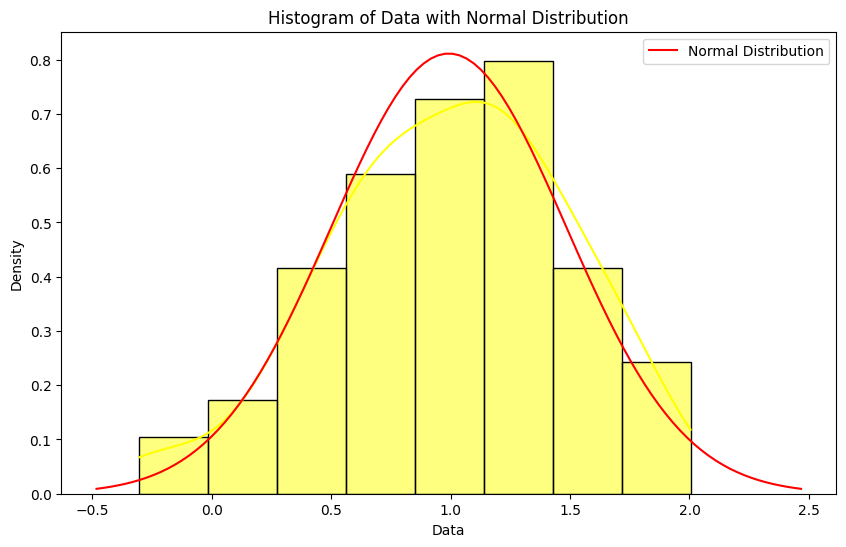

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Load the data from the CSV file
data5_gaussian = pd.read_csv('/content/GeneratedGaussianBigSampleData.csv')
df5 = data5_gaussian['Values']  # Extract the column containing the data

# Perform Kolmogorov-Smirnov test for normality
statistic, p_value = kstest(df5, 'norm')

# 💊 The following codeline for Kolmogorov-Smirnov test for normality does not work... ⤵️
#statistic, p_value = kstest(df5['Values'], 'norm', args=(df5['Values'].mean(), df5['Values'].std()))

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

# Plot histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(df5, kde=True, color='yellow', stat='density')

# Plot normal distribution curve
mu, sigma = np.mean(df5), np.std(df5)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal Distribution')

plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data with Normal Distribution')
plt.legend()
plt.show()

## 💿 💿 3️⃣-2️⃣ When you use your csv. file...
    Be aware that the following script generates the same result for everyone running it!

#📊 **Non-Gaussian Distribution Graph** using an uploaded file

Kolmogorov-Smirnov Test Statistic: 0.2053023107612641
p-value: 0.000357353913930228
Sample does not look Gaussian (reject H0)
Full set of data points:
      Values
0   0.820147
1   0.422675
2   1.058461
3   0.005394
4   1.504598
..       ...
95  1.825918
96  0.184956
97  9.102600
98  0.101265
99  0.564883

[100 rows x 1 columns]


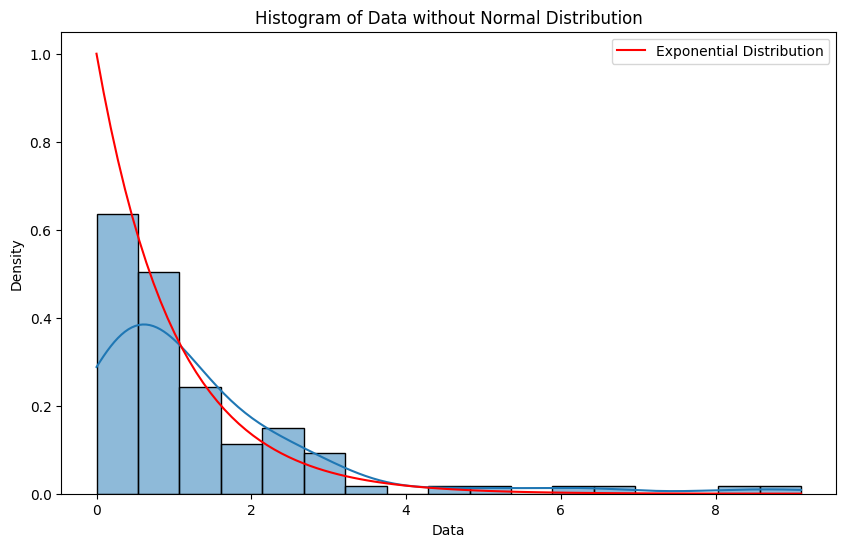

In [41]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, expon
import seaborn as sns

# Load the data from the CSV file
data6_non_gaussian = pd.read_csv('/content/GeneratedNonGaussianBigSampleData.csv')
df6 = data6_non_gaussian['Values']  # Extract the column containing the data

# Convert the data to a pandas DataFrame
df6 = pd.DataFrame(df6, columns=['Values'])

# 💊 Perform Kolmogorov-Smirnov test for normality ⤵️
statistic, p_value = kstest(df6['Values'], 'norm', args=(df6['Values'].mean(), df6['Values'].std()))

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

# Display the full set of data points
print("Full set of data points:")
print(df6)

# Plot histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(df6, kde=True, color='skyblue', stat='density')

# Plot exponential distribution curve (💊 Caution: Code lines for plotting Normal distribution curve is different!)
scale = 1  # Exponential distribution scale parameter (mean) gives a standard exponential distribution with a mean of 1.
# scale = 1 (Lambda = 1) is a common default because it simplifies the mathematics and is often used when the specific rate is not critical to the problem at hand.
x = np.linspace(0, df6['Values'].max(), 100)
plt.plot(x, expon.pdf(x, scale=scale), 'r-', label='Exponential Distribution')

plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data without Normal Distribution')
plt.legend()
plt.show()

## ➡️ T-test (with either SW test or KS test, p>0.05)
## ➡️➡️ Wilcoxon Rank Sum text (with either SW test or KS test, p<0.05)